# Medical Appointments Data Analysis

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [43]:
base_data = pd.read_csv('appointment_data.csv')
base_data.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [4]:
#get the total number of rows and columns
base_data.shape

(110527, 14)

In [67]:
#converting string format date to datetime format and getting the date in datetime.date format
base_data['ScheduledDay'] = pd.to_datetime(base_data['ScheduledDay']).dt.date.astype('datetime64[ns]')

In [68]:
base_data['ScheduledDay'] 

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-05-03
110523   2016-05-03
110524   2016-04-27
110525   2016-04-27
110526   2016-04-27
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns]

In [50]:
#creating the new column as weekday from base_data['ScheduledDay'] column
base_data['sch_weekday'] = base_data['ScheduledDay'].dt.weekday

In [51]:
#returns weekday as integer value (Monday=0, Sunday=6)
base_data['sch_weekday']

0         4
1         4
2         4
3         4
4         4
         ..
110522    1
110523    1
110524    2
110525    2
110526    2
Name: sch_weekday, Length: 110527, dtype: int64

In [107]:
base_data['AppointmentDay'] = pd.to_datetime(base_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [71]:
base_data['app_weekday'] = base_data['ScheduledDay'].dt.weekday
base_data['app_weekday']

0         4
1         4
2         4
3         4
4         4
         ..
110522    1
110523    1
110524    2
110525    2
110526    2
Name: app_weekday, Length: 110527, dtype: int64

In [72]:
base_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4


In [73]:
# Here, most of the appointments are done only on weedays, not on weekends
base_data['sch_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sch_weekday, dtype: int64

In [74]:
base_data['app_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: app_weekday, dtype: int64

In [75]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [78]:
#renaming few column names
base_data = base_data.rename(columns = {'Hipertension':'Hypertension', 'Handcap':'Handicap', 'SMS_received':'SMSReceived', 'No-show':'NoShow'})

In [83]:
base_data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4


In [82]:
#dropping few columns
base_data.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis = 1, inplace = True)

In [84]:
base_data.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.851955
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.378520
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


In [85]:
# Yes- appointments attended, N0- appointments not attended
base_data['NoShow'].value_counts()

No     88208
Yes    22319
Name: NoShow, dtype: int64

Text(0.5, 1.02, 'Count of Target variable per category')

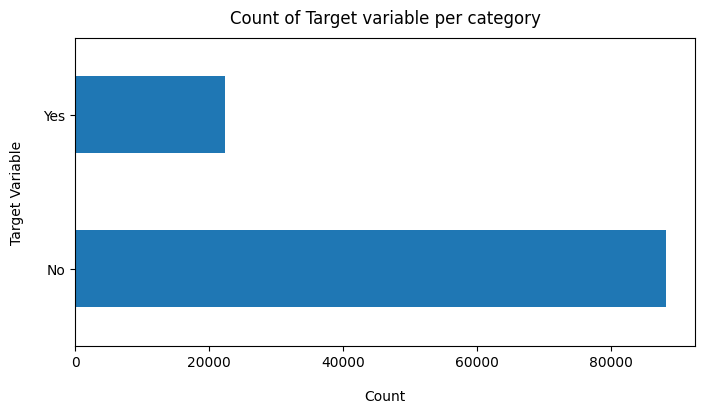

In [94]:
base_data['NoShow'].value_counts().plot(kind = 'barh', figsize = (8,4))
plt.xlabel('Count', labelpad = 14)
plt.ylabel('Target Variable', labelpad = 14)
plt.title('Count of Target variable per category', y = 1.02)

In [100]:
100*base_data['NoShow'].value_counts()/len(base_data['NoShow'])

No     79.806744
Yes    20.193256
Name: NoShow, dtype: float64

C:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


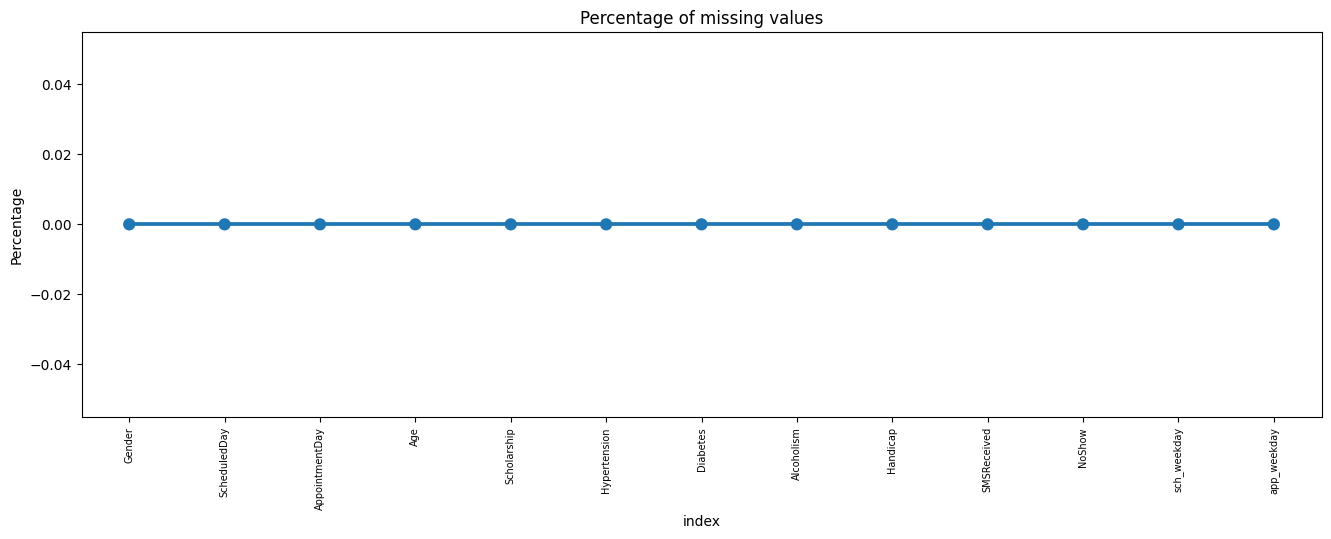

In [101]:
#Having a look that data contains missing values or not

missing = pd.DataFrame((base_data.isnull().sum())*100/base_data.shape[0]).reset_index()
plt.figure(figsize = (16,5))
ax = sns.pointplot('index',0,data = missing)
plt.xticks(rotation = 90, fontsize = 7)
plt.title('Percentage of missing values')
plt.ylabel('Percentage')
plt.show()

In [108]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int64         
 12  app_weekday     110527 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.0+ MB


In [109]:
#create a copy of base data for manipulation & processing
new_data = base_data.copy()

In [110]:
new_data

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,1,1
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,1,1
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,2,2
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,2,2


In [111]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int64         
 12  app_weekday     110527 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.0+ MB


In [127]:
base_data['Age'].max()
#base_data['Age'].min()

115

In [118]:
#filt = base_data['Age'] == -1
base_data['Age'].replace(-1,1, inplace=True)

In [128]:
base_data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4


In [135]:
hyp = base_data['Hypertension'].sum()
hyp

21801

In [136]:
dia = base_data['Diabetes'].sum()
dia

7943

In [137]:
alc = base_data['Alcoholism'].sum()
alc

3360

In [138]:
sch = base_data['Scholarship'].sum()
sch

10861

In [139]:
han = base_data['Handicap'].sum()
han

2459

In [140]:
diseases = ['Hypertension', 'Diabetes', 'Alcoholism', 'Scholarship', 'Handicap']
patients = []
for i in diseases:
    patients.append(base_data[i].sum())
print(patients)

[21801, 7943, 3360, 10861, 2459]


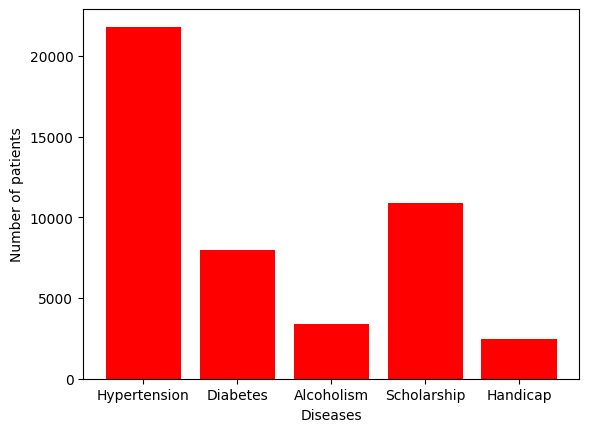

In [149]:
plt.bar(diseases, patients, color = 'red')

plt.xticks(diseases)
plt.ylabel('Number of patients')
plt.xlabel('Diseases')
plt.show()

In [176]:
# getting total number of months of scheduled appointments

(base_data['ScheduledDay'].dt.month).unique()

array([ 4,  3,  2,  1,  5, 11, 12,  6], dtype=int64)

In [177]:
#monthly-wise total number of scheduled appointments

(base_data['ScheduledDay'].dt.month).value_counts()

5     67421
4     25339
6     13750
3      3614
2       281
12       61
1        60
11        1
Name: ScheduledDay, dtype: int64

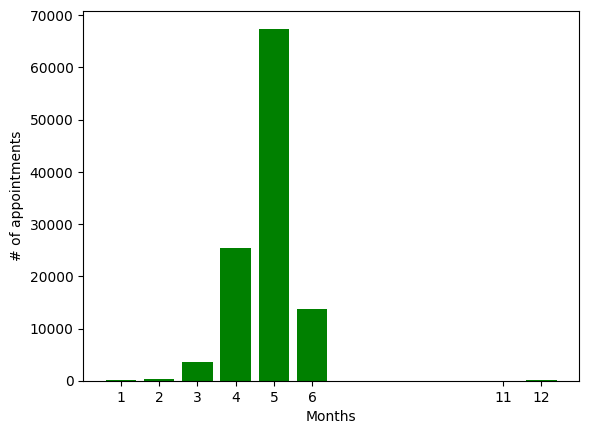

In [180]:
# Plotting monthly-wise scheduled appointments
month_arr = [5,4,6,3,2,12,1,11]
total_scheduled_appointments = [i for i in (base_data['ScheduledDay'].dt.month).value_counts()]

plt.bar(month_arr, total_scheduled_appointments, color = 'green')
plt.xticks(month_arr)
plt.ylabel('# of appointments')
plt.xlabel('Months')
plt.show()

In [182]:
# getting months of appointments attended
(base_data['AppointmentDay'].dt.month).unique()

array([4, 5, 6], dtype=int64)

In [183]:
#monthly-wise total number of appointments attended

(base_data['AppointmentDay'].dt.month).value_counts()

5    80841
6    26451
4     3235
Name: AppointmentDay, dtype: int64

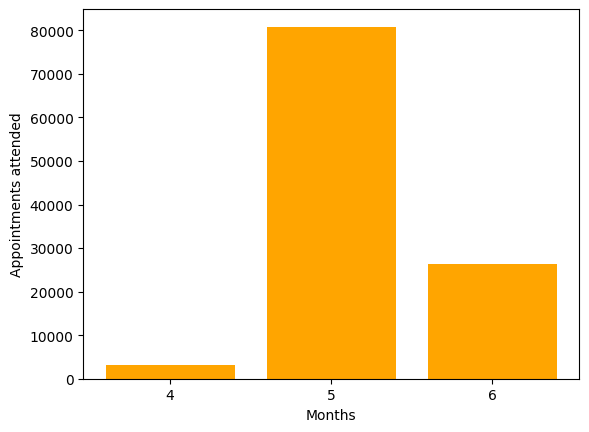

In [184]:
month_arr = [5,6,4]
total_appointments_attend = [i for i in (base_data['AppointmentDay'].dt.month).value_counts()]
plt.bar(month_arr, total_appointments_attend, color = 'orange')
plt.xticks(month_arr)
plt.ylabel('Appointments attended')
plt.xlabel('Months')
plt.show()

In [ ]:
#final data is stored to another csv file to same directory
base_data.to_csv('final_appointment_data.csv')